<a href="https://colab.research.google.com/github/Ghanashyam-Bhat/Summer_2/blob/main/CDSAML-PersonalityAnalysisForOnlineProfilles/PP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import cv2 as cv
import numpy as np
import time
from fer import *
import matplotlib.pyplot as plt 
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
%matplotlib inline
import urllib
import requests

In [ ]:
#pip install fer

In [ ]:
#pip install image-quality

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
base = "/content/drive/MyDrive/cdsaml/image/"
path = "/content/drive/MyDrive/cdsaml/in-the-wild-images/00000/00000.png"   

Read Image from Internet

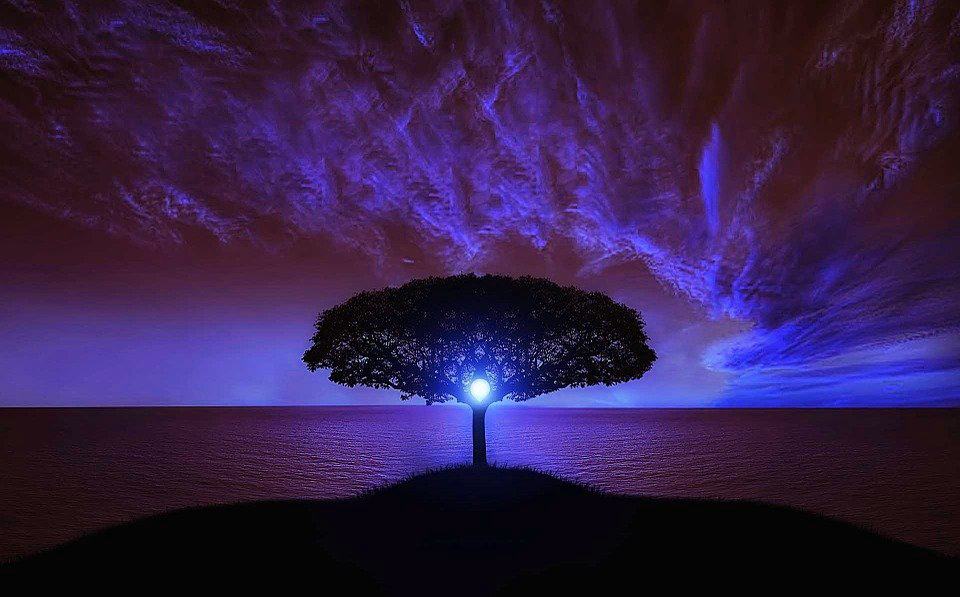

In [ ]:
# link = "https://cdn.pixabay.com/photo/2015/04/23/22/00/tree-736885_960_720.jpg"
# import requests
# import numpy as np
# from io import BytesIO
# from PIL import Image

# def url_to_img(url, save_as=''):
#   img = Image.open(BytesIO(requests.get(url).content))
#   if save_as:
#     img.save(save_as)
#   return np.array(img)

# img = url_to_img(link)
# #img = url_to_img(link,base+ 'sample.jpg')

# cv2_imshow(img)

# Image Resizing

In [ ]:
# Import the Images module from pillow
from PIL import Image
# Open the image by specifying the image path.
image_file = Image.open(path)
# the default
image_file.save(base+"edited.jpg", quality=50)

Image Quality Detection

In [ ]:
import imquality.brisque as brisque
import PIL.Image
img = PIL.Image.open(base+"edited.jpg")
count_quality = brisque.score(img)

/usr/local/lib/python3.7/dist-packages/imquality/brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)


# Face Detection

Eyes Closed
3 3 2


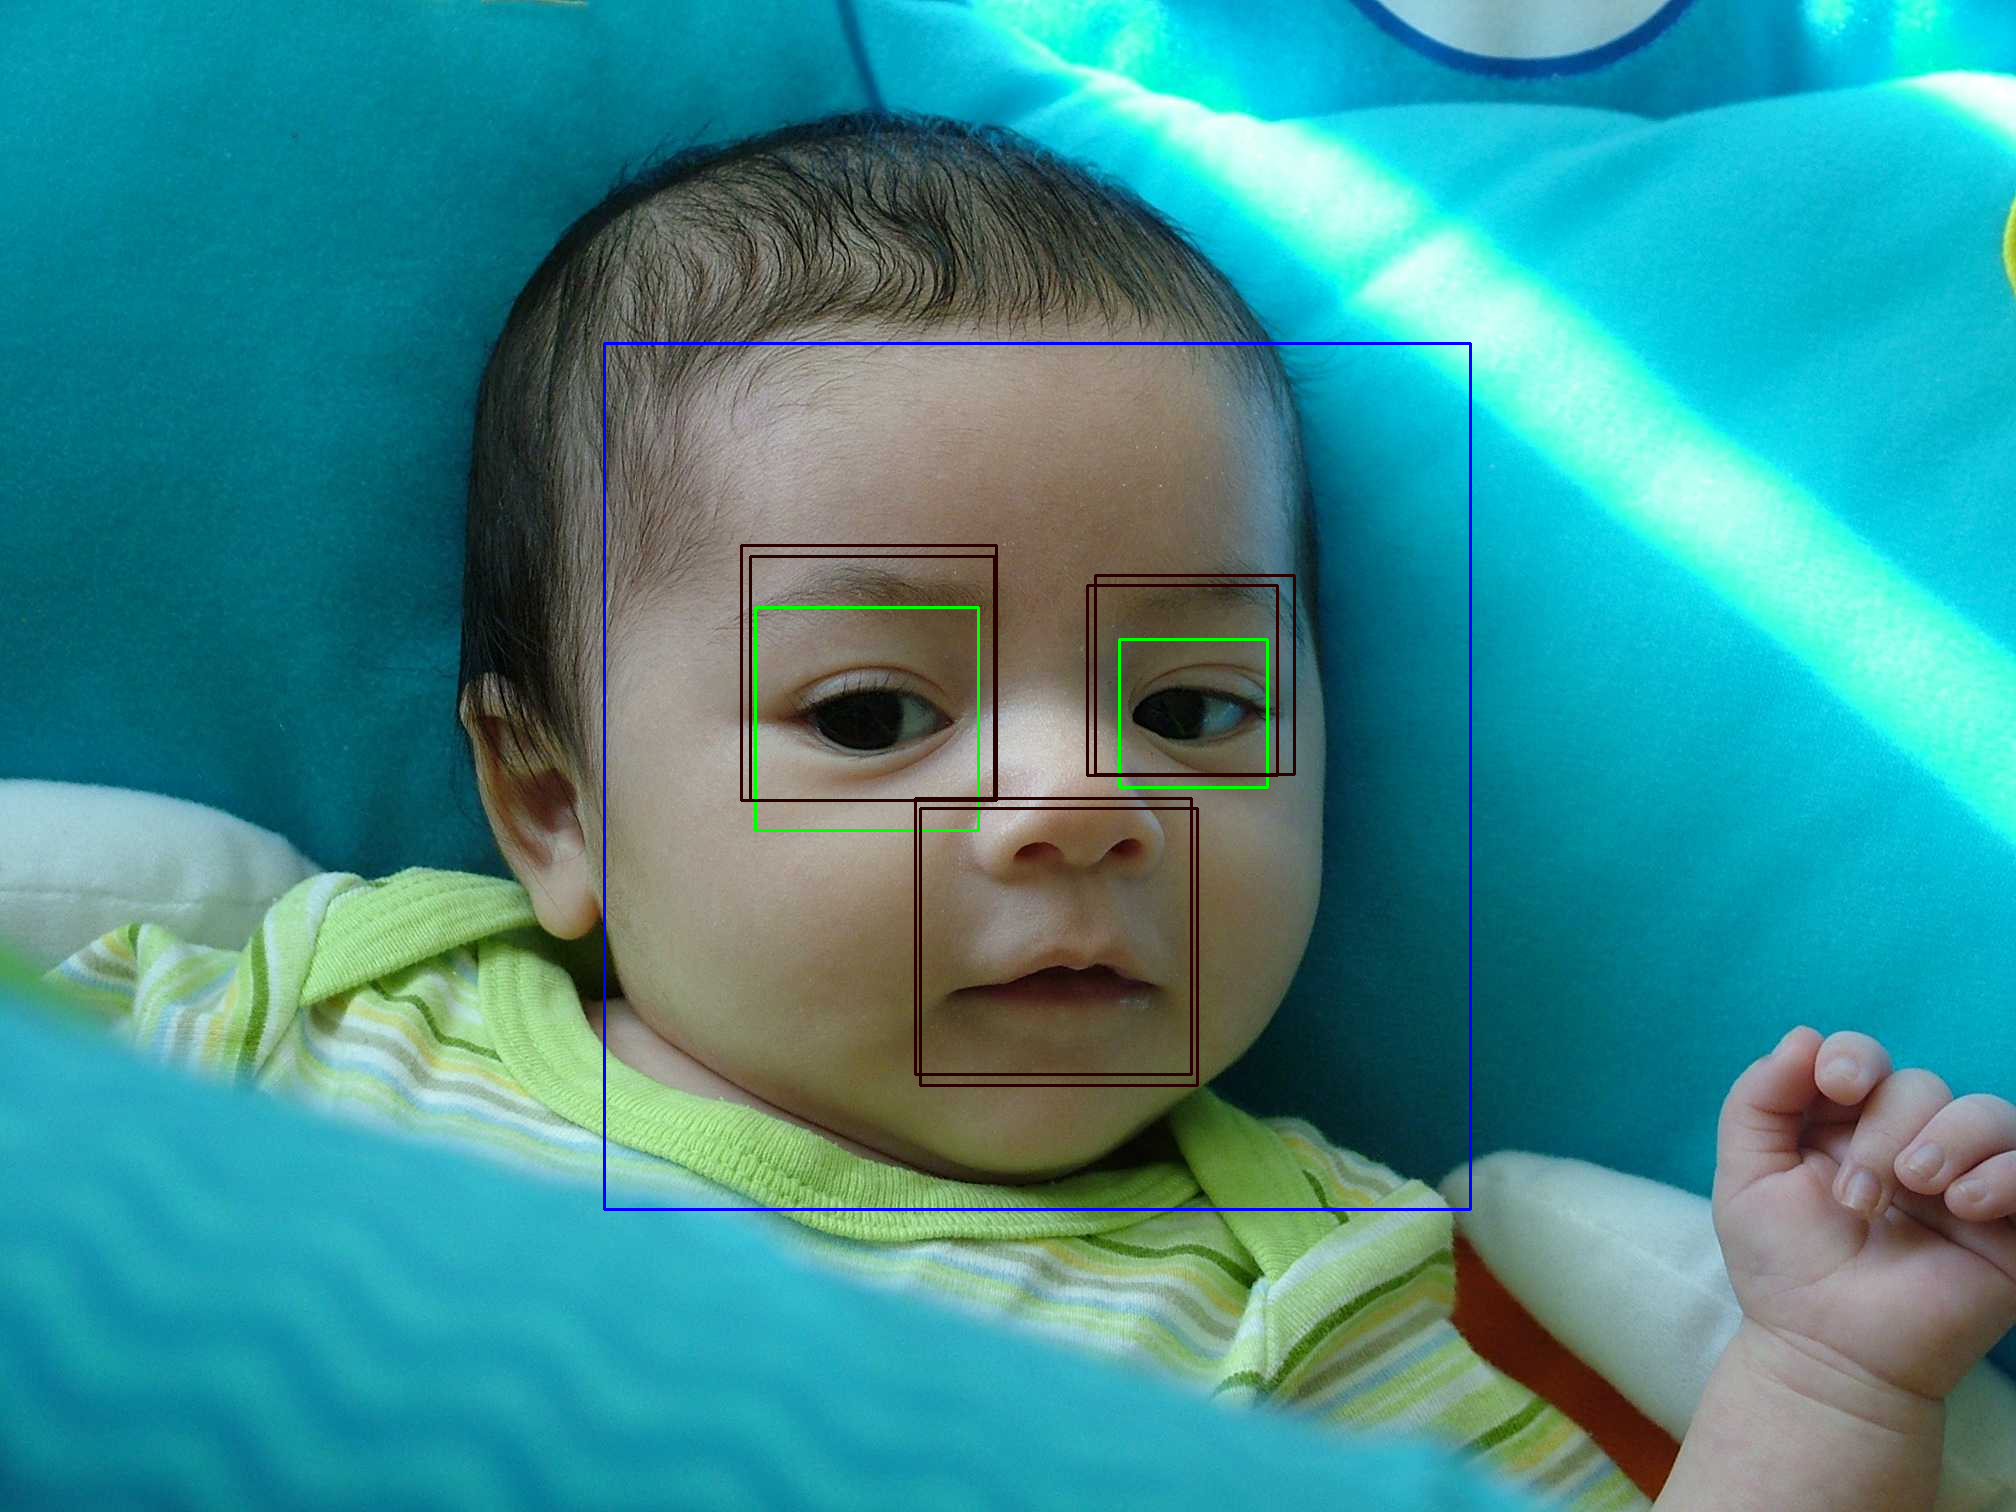

In [ ]:
#https://github.com/rk45825243/Face-eye-detection-using-Haar-Cascade-classifier
path2 = base+"edited.jpg"
img = cv.imread(path2)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/cdsaml/haarcasscade/haarcascade_frontalface_alt2.xml')
eye_cascade = cv.CascadeClassifier(r'/content/drive/MyDrive/cdsaml/haarcasscade/haarcascade_eye.xml')
lefteye_cascade = cv.CascadeClassifier('/content/drive/MyDrive/cdsaml/haarcasscade/haarcascade_lefteye_2splits.xml')
righteye_cascade = cv.CascadeClassifier('/content/drive/MyDrive/cdsaml/haarcasscade/haarcascade_righteye_2splits.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

count_eyes = 0
eyes_open = 1

count_face = 0
face_areas = []
ph,pw,pc = img.shape
pic_area = ph*pw
eye_area = []
pic_mid_point = (pw/2,ph/2)
face_mid_points = []
#print(ph,pw)
for (x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = img[y:y + h, x:x + w]
    face_areas.append(w*h)
    face_mid_points.append((x+w/2,y+h/2))
    count_face +=1 
    #print(h,w)

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
        count_eyes+=1 

eye = 0
openEye = 0
counter = 0
openEyes = eye_cascade.detectMultiScale(roi_gray)
AllEyes = lefteye_cascade.detectMultiScale(roi_gray)
AllEyes2 = righteye_cascade.detectMultiScale(roi_gray)
for (ex, ey, ew, eh) in openEyes:
    cv.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0),2)
    openEye += 1

for (ex, ey, ew, eh) in AllEyes:
    eye += 1
    cv.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 0, 40),2)
    eye_area.append(ew*eh)

for (ex, ey, ew, eh) in AllEyes2:
    counter += 1
    cv.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 0, 40),2)
    eye_area.append(ew*eh)

if (openEye != eye):
    print ('Eyes Closed')
    eyes_open = 0


print(eye,counter,openEye)

eye_area.sort(reverse=True)
cv2_imshow( img)
cv.destroyAllWindows()

# People and Object Detection

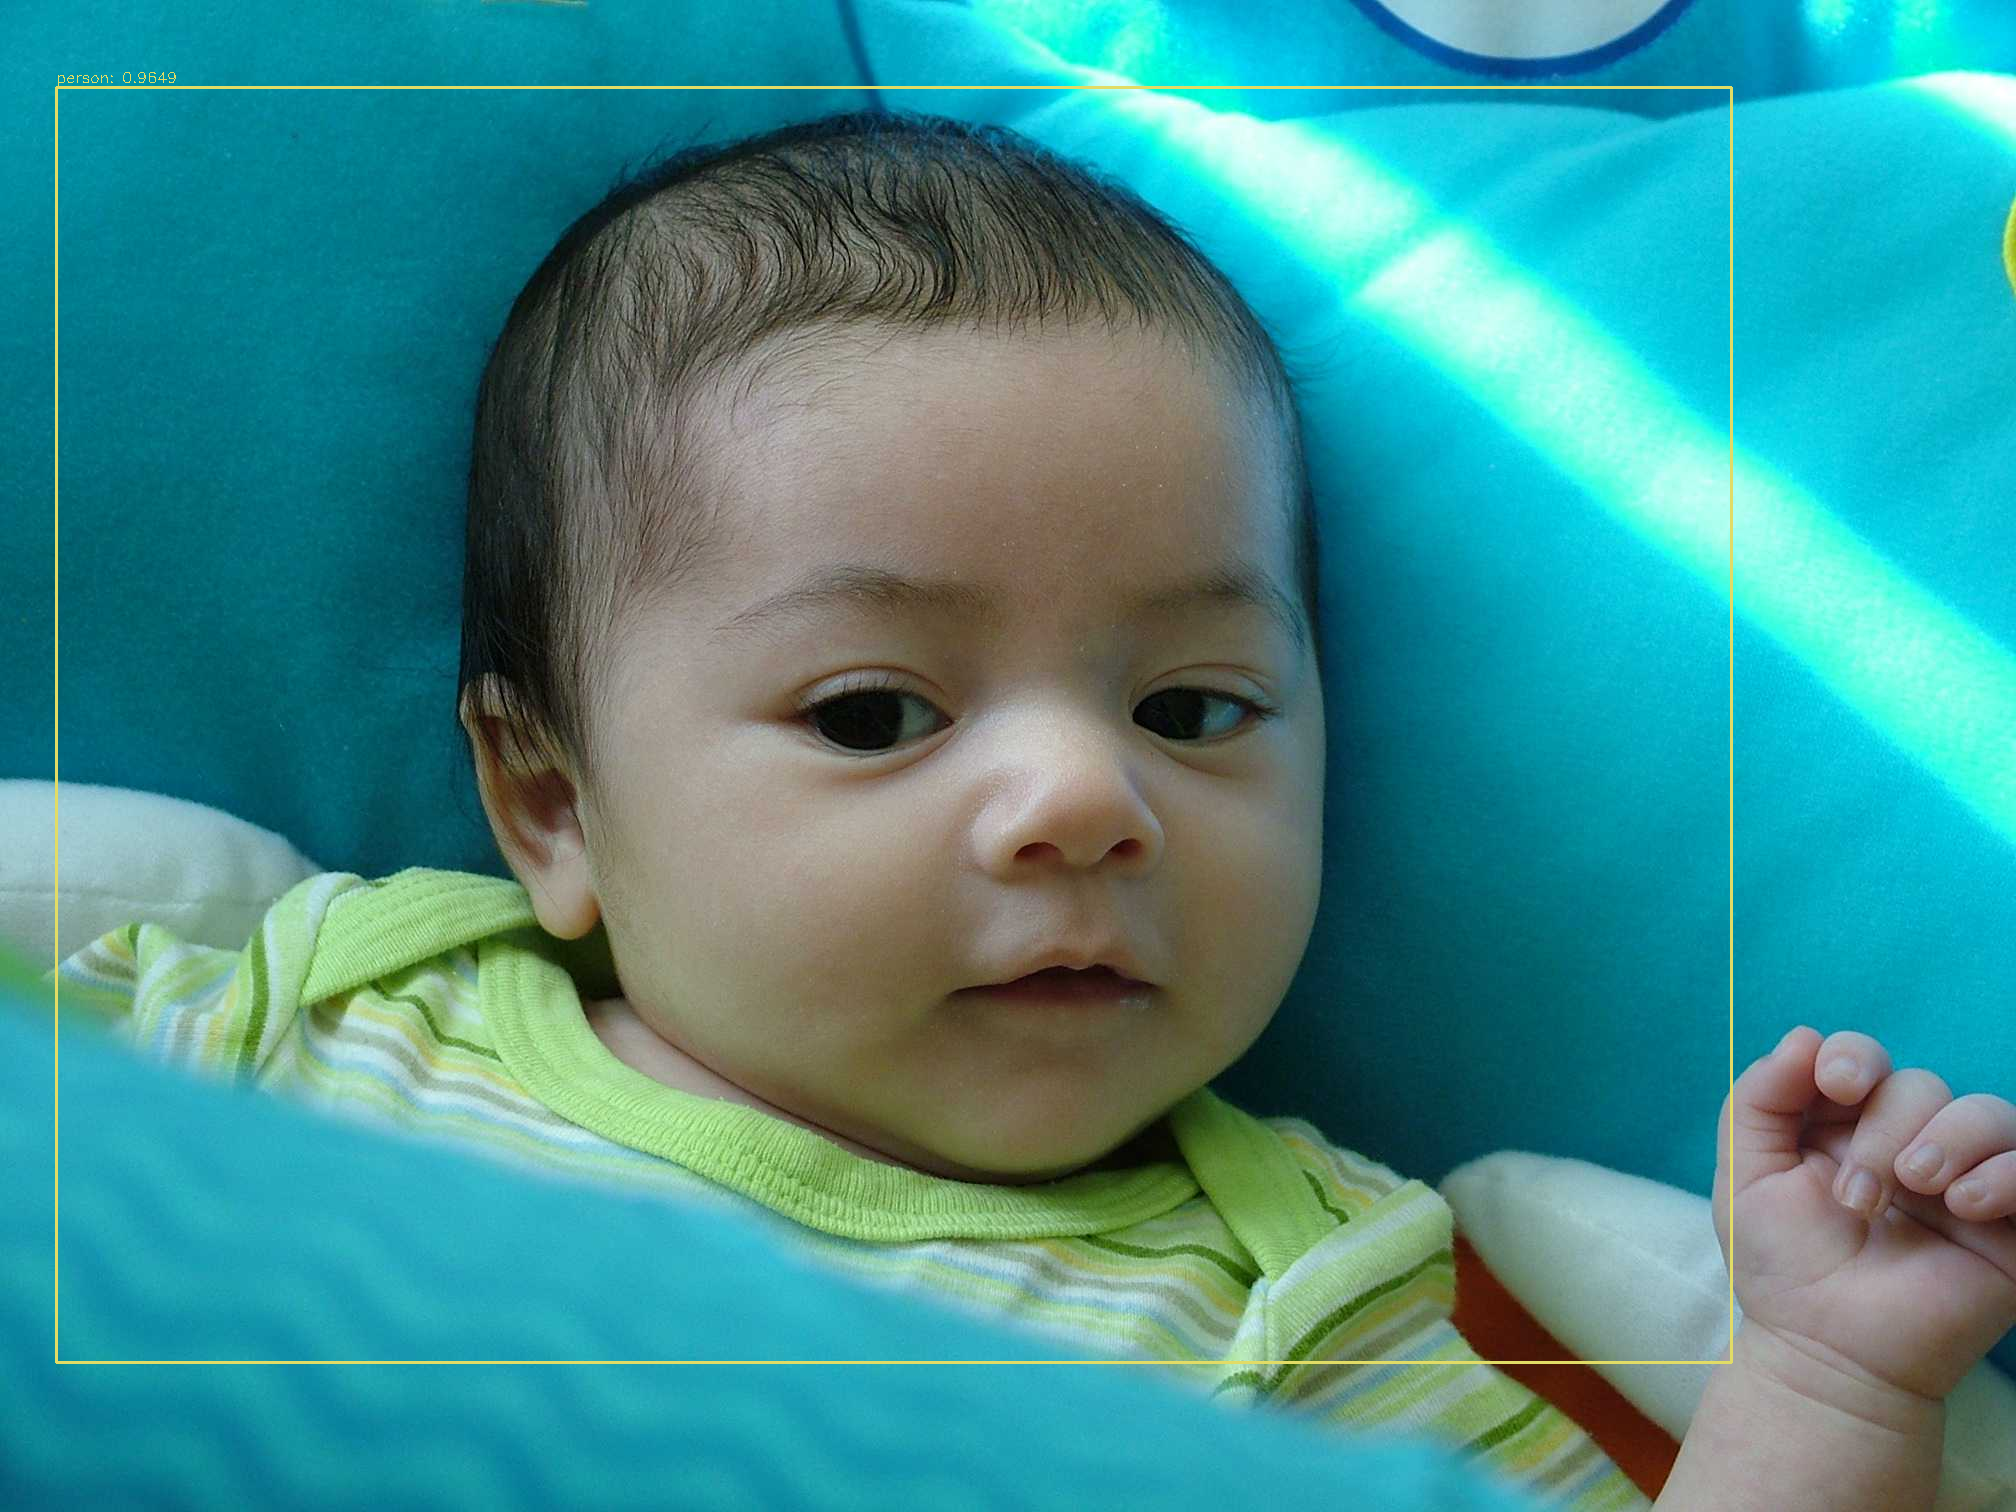

In [ ]:
img = cv.imread(path2)
#cv2_imshow(img)
#cv.waitKey(1)

# Load names of classes and get random colors
classes = open('/content/drive/MyDrive/cdsaml/darknet/data/coco.names').read().strip().split('\n')
np.random.seed(42)
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

# Give the configuration and weight files for the model and load the network.
net = cv.dnn.readNetFromDarknet('/content/drive/MyDrive/cdsaml/darknet/cfg/yolov3.cfg', '/content/drive/MyDrive/cdsaml/darknet/yolov3.weights')
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
# net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)

# determine the output layer
ln = net.getLayerNames()
#print(net.getUnconnectedOutLayers())
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# construct a blob from the image
blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
r = blob[0, 0, :, :]

#cv2_imshow( r)
text = f'Blob shape={blob.shape}'
#cv.displayOverlay('blob', text)
#cv.waitKey(1)

net.setInput(blob)
t0 = time.time()
outputs = net.forward(ln)
t = time.time()
#print('time=', t-t0)

#print(len(outputs))
#for out in outputs:
    #print(out.shape)

"""def trackbar2(x):
    confidence = x/100
    r = r0.copy()
    for output in np.vstack(outputs):
        if output[4] > confidence:
            x, y, w, h = output[:4]
            p0 = int((x-w/2)*416), int((y-h/2)*416)
            p1 = int((x+w/2)*416), int((y+h/2)*416)
            cv.rectangle(r, p0, p1, 1, 1)
    #cv.imshow(r)
    text = f'Bbox confidence={confidence}'
    #cv.displayOverlay('blob', text)"""

r0 = blob[0, 0, :, :]
r = r0.copy()
#cv2_imshow( r)
#cv.createTrackbar('confidence', 'blob', 50, 101, trackbar2)
#trackbar2(50)

boxes = []
confidences = []
classIDs = []
h, w = img.shape[:2]

for output in outputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > 0.5:
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            box = [x, y, int(width), int(height)]
            boxes.append(box)
            confidences.append(float(confidence))
            classIDs.append(classID)

indices = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
count_objects = 0
count_person = 0
if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in colors[classIDs[i]]]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
        cv.putText(img, text, (x, y - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
        if "person" not in text:
            count_objects += 1
        else:
            count_person += 1

cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()



# Emotion Detection

[{'box': [666, 380, 653, 783], 'emotions': {'angry': 0.04, 'disgust': 0.0, 'fear': 0.08, 'happy': 0.0, 'sad': 0.39, 'surprise': 0.06, 'neutral': 0.42}}]


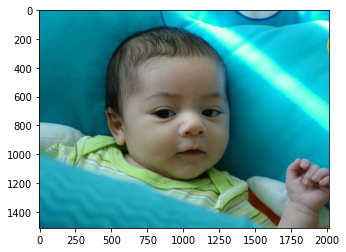

In [ ]:
#https://towardsdatascience.com/the-ultimate-guide-to-emotion-recognition-from-facial-expressions-using-python-64e58d4324ff
test_image_one = plt.imread(path2)
emo_detector = FER(mtcnn=True)

# Capture all the emotions on the image
captured_emotions = emo_detector.detect_emotions(test_image_one)

# Print all captured emotions with the image
print(captured_emotions)
plt.imshow(test_image_one)

# Use the top Emotion() function to call for the dominant emotion in the image
dominant_emotion, emotion_score = emo_detector.top_emotion(test_image_one)


In [ ]:
print("Total number of objects: ",count_objects)
print("Total number of people: ",count_person)
print("Total number of face: ",count_face)
print("Total number of eyes: ",count_eyes)
print("Image Quality: ",count_quality)
if count_face>=1:
  print("Face area ratio: ",max(face_areas)/pic_area)
  print("Face mid point: ",face_mid_points[face_areas.index(max(face_areas))])
print("Picture mid point: ",pic_mid_point)
if len(eye_area)>=2:
  print("Eye ratio: ",eye_area[1]/eye_area[0])
print("Emortion: ",dominant_emotion,"(",emotion_score,")")
if eyes_open:
  print("Open Eyes")
else:
  print("Close Eyes")

Total number of objects:  0
Total number of people:  1
Total number of face:  1
Total number of eyes:  2
Image Quality:  36.24328037611778
Face area ratio:  0.2460330582850424
Face mid point:  (1037.0, 776.0)
Picture mid point:  (1008.0, 756.0)
Eye ratio:  0.992792816275463
Emortion:  neutral ( 0.42 )
Close Eyes


Eye Contact Detection

In [ ]:
# import torch.nn as nn
# import torch
# import math


# def model_static(pretrained=False, **kwargs):
#     model = ResNet([3, 4, 6, 3], **kwargs)
#     if pretrained:
#         print('loading saved model weights')
#         model_dict = model.state_dict()
#         snapshot = torch.load(pretrained)
#         snapshot = {k: v for k, v in snapshot.items() if k in model_dict}
#         model_dict.update(snapshot)
#         model.load_state_dict(model_dict)
#     return model


# class ResNet(nn.Module):
#     def __init__(self, layers):
#         super(ResNet, self).__init__()
#         self.inplanes = 64
#         self.conv1 = nn.Conv2d(3, 64, kernel_size = 7, stride = 2, padding = 3,
#                                bias = False)
#         self.bn1 = nn.BatchNorm2d(64)
#         self.relu = nn.ReLU(inplace = True)
#         self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
#         self.layer1 = self._make_layer(64, layers[0])
#         self.layer2 = self._make_layer(128, layers[1], stride=2)
#         self.layer3 = self._make_layer(256, layers[2], stride=2)
#         self.layer4 = self._make_layer(512, layers[3], stride=2)
#         self.avgpool = nn.AvgPool2d(7, stride = 1)
#         self.fc_theta = nn.Linear(512 * Bottleneck.expansion, 34)
#         self.fc_phi = nn.Linear(512 * Bottleneck.expansion, 34)
#         self.fc_ec = nn.Linear(512 * Bottleneck.expansion, 1)
#         self.init_param()

#     def init_param(self):
#         for m in self.modules():
#             if isinstance(m, nn.Conv2d):
#                 n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
#                 m.weight.data.normal_(0, math.sqrt(2./n))
#             elif isinstance(m, nn.BatchNorm2d):
#                 m.weight.data.fill_(1)
#                 m.bias.data.zero_()
#             elif isinstance(m, nn.Linear):
#                 n = m.weight.shape[0] * m.weight.shape[1]
#                 m.weight.data.normal_(0, math.sqrt(2./n))
#                 m.bias.data.zero_()

#     def _make_layer(self, planes, blocks, stride = 1):
#         downsample = None
#         layers = []

#         if stride != 1 or self.inplanes != planes * Bottleneck.expansion:
#             downsample = nn.Sequential(
#                 nn.Conv2d(self.inplanes, planes * Bottleneck.expansion,
#                           kernel_size=1, stride=stride, bias=False),
#                 nn.BatchNorm2d(planes * Bottleneck.expansion),
#                 )

#         layers.append(Bottleneck(self.inplanes, planes, stride, downsample))
#         self.inplanes = planes * Bottleneck.expansion
#         for i in range(1, blocks):
#             layers.append(Bottleneck(self.inplanes, planes))

#         return nn.Sequential(*layers)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.bn1(x)
#         x = self.relu(x)
#         x = self.maxpool(x)

#         x = self.layer1(x)
#         x = self.layer2(x)
#         x = self.layer3(x)
#         x = self.layer4(x)

#         x = self.avgpool(x)
#         x = x.view(x.size(0), -1)
#         x = self.fc_ec(x)

#         return x


# class Bottleneck(nn.Module):
#     expansion = 4

#     def __init__(self, inplanes, planes, stride=1, downsample=None):
#         super(Bottleneck, self).__init__()
#         self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
#         self.bn1 = nn.BatchNorm2d(planes)
#         self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
#         self.bn2 = nn.BatchNorm2d(planes)
#         self.conv3 = nn.Conv2d(planes, planes * 4, kernel_size=1, bias=False)
#         self.bn3 = nn.BatchNorm2d(planes * 4)
#         self.relu = nn.ReLU(inplace=True)
#         self.downsample = downsample
#         self.stride = stride

#     def forward(self, x):
#         residual = x

#         out = self.conv1(x)
#         out = self.bn1(out)
#         out = self.relu(out)

#         out = self.conv2(out)
#         out = self.bn2(out)
#         out = self.relu(out)

#         out = self.conv3(out)
#         out = self.bn3(out)

#         if self.downsample is not None:
#             residual = self.downsample(x)

#         out += residual
#         out = self.relu(out)

#         return out

In [ ]:
# #Eye contact
# #https://github.com/rehg-lab/eye-contact-cnn

# import dlib
# import cv2
# import argparse, os, random
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torchvision
# from torchvision import datasets, transforms
# import pandas as pd
# import numpy as np
# #from model import model_static
# from PIL import Image
# from PIL import ImageDraw
# from PIL import ImageFont
# from colour import Color


# parser = argparse.ArgumentParser()

# parser.add_argument('--video', type=str, help='input video path. live cam is used when not specified')
# parser.add_argument('--face', type=str, help='face detection file path. dlib face detector is used when not specified')
# parser.add_argument('--model_weight', type=str, help='path to model weights file', default='data/model_weights.pkl')
# parser.add_argument('--jitter', type=int, help='jitter bbox n times, and average results', default=0)
# parser.add_argument('-save_vis', help='saves output as video', action='store_true')
# parser.add_argument('-save_text', help='saves output as text', action='store_true')
# parser.add_argument('-display_off', help='do not display frames', action='store_true')

# args = parser.parse_args()

# CNN_FACE_MODEL = '/content/drive/MyDrive/cdsaml/eye_contact/data' # from http://dlib.net/files/mmod_human_face_detector.dat.bz2


# def bbox_jitter(bbox_left, bbox_top, bbox_right, bbox_bottom):
#     cx = (bbox_right+bbox_left)/2.0
#     cy = (bbox_bottom+bbox_top)/2.0
#     scale = random.uniform(0.8, 1.2)
#     bbox_right = (bbox_right-cx)*scale + cx
#     bbox_left = (bbox_left-cx)*scale + cx
#     bbox_top = (bbox_top-cy)*scale + cy
#     bbox_bottom = (bbox_bottom-cy)*scale + cy
#     return bbox_left, bbox_top, bbox_right, bbox_bottom


# def drawrect(drawcontext, xy, outline=None, width=0):
#     (x1, y1), (x2, y2) = xy
#     points = (x1, y1), (x2, y1), (x2, y2), (x1, y2), (x1, y1)
#     drawcontext.line(points, fill=outline, width=width)


# def run(video_path, face_path, model_weight, jitter, vis, display_off, save_text):
#     # set up vis settings

#     red = Color("red")
#     colors = list(red.range_to(Color("green"),10))
#     font = ImageFont.truetype("/content/drive/MyDrive/cdsaml/eye_contact/data/arial.ttf", 40)

#     # set up video source
#     if video_path is None:
#         cap = cv2.VideoCapture(0)
#         video_path = 'live.avi'
#     else:
#         cap = cv2.VideoCapture(video_path)

#     # set up output file
#     if save_text:
#         outtext_name = os.path.basename(video_path).replace('.avi','_output.txt')
#         f = open(outtext_name, "w")
#     if vis:
#         outvis_name = os.path.basename(video_path).replace('.avi','_output.avi')
#         imwidth = int(cap.get(3)); imheight = int(cap.get(4))
#         outvid = cv2.VideoWriter(outvis_name,cv2.VideoWriter_fourcc('M','J','P','G'), cap.get(5), (imwidth,imheight))

#     # set up face detection mode
#     if face_path is None:
#         facemode = 'DLIB'
#     else:
#         facemode = 'GIVEN'
#         column_names = ['frame', 'left', 'top', 'right', 'bottom']
#         df = pd.read_csv(face_path, names=column_names, index_col=0)
#         df['left'] -= (df['right']-df['left'])*0.2
#         df['right'] += (df['right']-df['left'])*0.2
#         df['top'] -= (df['bottom']-df['top'])*0.1
#         df['bottom'] += (df['bottom']-df['top'])*0.1
#         df['left'] = df['left'].astype('int')
#         df['top'] = df['top'].astype('int')
#         df['right'] = df['right'].astype('int')
#         df['bottom'] = df['bottom'].astype('int')

#     if (cap.isOpened()== False):
#         print("Error opening video stream or file")
#         exit()

#     if facemode == 'DLIB':
#         cnn_face_detector = dlib.cnn_face_detection_model_v1(CNN_FACE_MODEL)
#     frame_cnt = 0

#     # set up data transformation
#     test_transforms = transforms.Compose([transforms.Resize(224), transforms.CenterCrop(224), transforms.ToTensor(),
#                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

#     # load model weights
#     model = model_static(model_weight)
#     model_dict = model.state_dict()
#     snapshot = torch.load(model_weight)
#     model_dict.update(snapshot)
#     model.load_state_dict(model_dict)

#     model.cuda()
#     model.train(False)

#     # video reading loop
#     while(cap.isOpened()):
#         ret, frame = cap.read()
#         if ret == True:
#             height, width, channels = frame.shape
#             frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

#             frame_cnt += 1
#             bbox = []
#             if facemode == 'DLIB':
#                 dets = cnn_face_detector(frame, 1)
#                 for d in dets:
#                     l = d.rect.left()
#                     r = d.rect.right()
#                     t = d.rect.top()
#                     b = d.rect.bottom()
#                     # expand a bit
#                     l -= (r-l)*0.2
#                     r += (r-l)*0.2
#                     t -= (b-t)*0.2
#                     b += (b-t)*0.2
#                     bbox.append([l,t,r,b])
#             elif facemode == 'GIVEN':
#                 if frame_cnt in df.index:
#                     bbox.append([df.loc[frame_cnt,'left'],df.loc[frame_cnt,'top'],df.loc[frame_cnt,'right'],df.loc[frame_cnt,'bottom']])

#             frame = Image.fromarray(frame)
#             for b in bbox:
#                 face = frame.crop((b))
#                 img = test_transforms(face)
#                 img.unsqueeze_(0)
#                 if jitter > 0:
#                     for i in range(jitter):
#                         bj_left, bj_top, bj_right, bj_bottom = bbox_jitter(b[0], b[1], b[2], b[3])
#                         bj = [bj_left, bj_top, bj_right, bj_bottom]
#                         facej = frame.crop((bj))
#                         img_jittered = test_transforms(facej)
#                         img_jittered.unsqueeze_(0)
#                         img = torch.cat([img, img_jittered])

#                 # forward pass
#                 output = model(img.cuda())
#                 if jitter > 0:
#                     output = torch.mean(output, 0)
#                 score = F.sigmoid(output).item()

#                 coloridx = min(int(round(score*10)),9)
#                 draw = ImageDraw.Draw(frame)
#                 drawrect(draw, [(b[0], b[1]), (b[2], b[3])], outline=colors[coloridx].hex, width=5)
#                 draw.text((b[0],b[3]), str(round(score,2)), fill=(255,255,255,128), font=font)
#                 if save_text:
#                     f.write("%d,%f\n"%(frame_cnt,score))

#             if not display_off:
#                 frame = np.asarray(frame) # convert PIL image back to opencv format for faster display
#                 frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#                 cv2.imshow('',frame)
#                 if vis:
#                     outvid.write(frame)
#                 key = cv2.waitKey(1) & 0xFF
#                 if key == ord('q'):
#                     break
#         else:
#             break

#     if vis:
#         outvid.release()
#     if save_text:
#         f.close()
#     cap.release()
#     print ('DONE!')


# if __name__ == "__main__":
#     run(args.video, args.face, args.model_weight, args.jitter, args.save_vis, args.display_off, args.save_text)


'\nimport dlib\nimport cv2\nimport argparse, os, random\nimport torch\nimport torch.nn as nn\nimport torch.nn.functional as F\nimport torchvision\nfrom torchvision import datasets, transforms\nimport pandas as pd\nimport numpy as np\n#from model import model_static\nfrom PIL import Image\nfrom PIL import ImageDraw\nfrom PIL import ImageFont\nfrom colour import Color\n\n\nparser = argparse.ArgumentParser()\n\nparser.add_argument(\'--video\', type=str, help=\'input video path. live cam is used when not specified\')\nparser.add_argument(\'--face\', type=str, help=\'face detection file path. dlib face detector is used when not specified\')\nparser.add_argument(\'--model_weight\', type=str, help=\'path to model weights file\', default=\'data/model_weights.pkl\')\nparser.add_argument(\'--jitter\', type=int, help=\'jitter bbox n times, and average results\', default=0)\nparser.add_argument(\'-save_vis\', help=\'saves output as video\', action=\'store_true\')\nparser.add_argument(\'-save_text\

In [ ]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils.video import FileVideoStream
from imutils.video import VideoStream
from imutils import face_utils
import numpy as np
import argparse
import imutils
import time
import dlib
import cv2


def eye_aspect_ratio(eye):
    # compute the euclidean distances between the two sets of
    # vertical eye landmarks (x, y)-coordinates
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])

    # compute the euclidean distance between the horizontal
    # eye landmark (x, y)-coordinates
    C = dist.euclidean(eye[0], eye[3])

    # compute the eye aspect ratio
    ear = (A + B) / (2.0 * C)

    # return the eye aspect ratio
    return ear

# frames the eye must be below the threshold
EYE_AR_THRESH = 0.35
EYE_AR_CONSEC_FRAMES = 3

# initialize the frame counters and the total number of blinks
COUNTER = 0
TOTAL = 0

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
print("[INFO] loading facial landmark predictor...")
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/cdsaml/Dlib/shape_predictor_68_face_landmarks.dat")

# grab the indexes of the facial landmarks for the left and
# right eye, respectively
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

vs = VideoStream(src=0).start()
# vs = VideoStream(usePiCamera=True).start()
time.sleep(1.0)

# loop over frames from the video stream
frame = img
#frame = imutils.resize(frame, width=450)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale frame
rects = detector(gray, 0)
print(rects)
# loop over the face detections
for rect in rects:
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

    # extract the left and right eye coordinates, then use the
    # coordinates to compute the eye aspect ratio for both eyes
    leftEye = shape[lStart:lEnd]
    rightEye = shape[rStart:rEnd]
    leftEAR = eye_aspect_ratio(leftEye)
    rightEAR = eye_aspect_ratio(rightEye)

    # average the eye aspect ratio together for both eyes
    ear = (leftEAR + rightEAR)

    # compute the convex hull for the left and right eye, then
    # visualize each of the eyes
    leftEyeHull = cv2.convexHull(leftEye)
    rightEyeHull = cv2.convexHull(rightEye)
    cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
    cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)

    # check to see if the eye aspect ratio is below the blink
    # threshold, and if so, increment the blink frame counter
    if ear < EYE_AR_THRESH:
        cv2.putText(frame, "Eye: {}".format("close"), (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        print("Closed Eyes")
        cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)


    # otherwise, the eye aspect ratio is not below the blink
    # threshold
    else:
        cv2.putText(frame, "Eye: {}".format("Open"), (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        print("Open Eyes")
        cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# draw the total number of blinks on the frame along with
# the computed eye aspect ratio for the frame

# show the frame


# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()

[INFO] loading facial landmark predictor...
rectangles[[(667, 410) (1438, 1181)]]
Open Eyes
